### Python module/package imports for this chapter

In [1]:
import math, json, collections, itertools

In [2]:
import numpy as np
import matplotlib.pyplot as pp
%matplotlib inline

In [3]:
# from mpl_toolkits.basemap import Basemap
# import geopy

## Beyond lists, dicts, and sets: more powerful collections

In [4]:
open('goldmedals.txt','r').readlines()[:10]

['1896\tThomas Burke\tUSA\t100m men\n',
 '1896\tThomas Curtis\tUSA\t110m hurdles men\n',
 '1896\tEdwin Flack\tAUS\t1500m men\n',
 '1896\tThomas Burke\tUSA\t400m men\n',
 '1896\tEdwin Flack\tAUS\t800m men\n',
 '1896\tRobert Garrett\tUSA\tdiscus throw men\n',
 '1896\tEllery Clark\tUSA\thigh jump men\n',
 '1896\tEllery Clark\tUSA\tlong jump men\n',
 '1896\tSpyridon Louis\tGRE\tmarathon men\n',
 '1896\tWilliam Welles Hoyt\tUSA\tpole vault men\n']

In [5]:
medal = collections.namedtuple('medal',['year','athlete','team','event'])

In [6]:
m = medal('1896','Thomas Burke','USA','100m men')

In [7]:
m

medal(year='1896', athlete='Thomas Burke', team='USA', event='100m men')

In [8]:
m.year, m.athlete

('1896', 'Thomas Burke')

In [9]:
medals = [medal(*line.split('\t')) for line in open('goldmedals.txt','r')]

In [10]:
medals[:5]

[medal(year='1896', athlete='Thomas Burke', team='USA', event='100m men\n'),
 medal(year='1896', athlete='Thomas Curtis', team='USA', event='110m hurdles men\n'),
 medal(year='1896', athlete='Edwin Flack', team='AUS', event='1500m men\n'),
 medal(year='1896', athlete='Thomas Burke', team='USA', event='400m men\n'),
 medal(year='1896', athlete='Edwin Flack', team='AUS', event='800m men\n')]

In [11]:
medals = [medal(*line.strip().split('\t')) for line in open('goldmedals.txt','r')]

In [12]:
medals[:5]

[medal(year='1896', athlete='Thomas Burke', team='USA', event='100m men'),
 medal(year='1896', athlete='Thomas Curtis', team='USA', event='110m hurdles men'),
 medal(year='1896', athlete='Edwin Flack', team='AUS', event='1500m men'),
 medal(year='1896', athlete='Thomas Burke', team='USA', event='400m men'),
 medal(year='1896', athlete='Edwin Flack', team='AUS', event='800m men')]

In [13]:
teams = collections.Counter(medal.team for medal in medals)

In [14]:
teams

Counter({'USA': 521,
         'AUS': 23,
         'GRE': 7,
         'GBR': 71,
         'CAN': 21,
         'ZZX': 5,
         'HUN': 10,
         'FRA': 14,
         'RSA': 8,
         'SWE': 21,
         'FIN': 60,
         'NOR': 7,
         'ITA': 19,
         'GER': 18,
         'POL': 27,
         'IRL': 4,
         'JPN': 7,
         'ARG': 2,
         'NZL': 10,
         'TCH': 11,
         'NED': 9,
         'JAM': 42,
         'BEL': 4,
         'AUT': 1,
         'LUX': 1,
         'URS': 79,
         'BRA': 5,
         'EUA': 7,
         'ROU': 11,
         'ETH': 22,
         'KEN': 33,
         'TUN': 1,
         'GDR': 50,
         'FRG': 15,
         'UGA': 2,
         'TRI': 2,
         'MEX': 3,
         'CUB': 10,
         'BUL': 5,
         'MAR': 6,
         'POR': 4,
         'CHN': 8,
         'ESP': 3,
         'ALG': 4,
         'EUN': 12,
         'LTU': 3,
         'KOR': 1,
         'RUS': 29,
         'ECU': 1,
         'BDI': 1,
         'SYR': 1,
       

In [15]:
teams.most_common(5)

[('USA', 521), ('URS', 79), ('GBR', 71), ('FIN', 60), ('GDR', 50)]

In [16]:
def best_by_year(year):
    counts = collections.Counter(medal.team for medal in medals if medal.year == str(year))
    best = counts.most_common(5)
    
    return [b[0] for b in best], [b[1] for b in best]

In [17]:
best_by_year(1900)

(['USA', 'ZZX', 'GBR', 'CAN', 'HUN'], [16, 5, 3, 1, 1])

([<matplotlib.axis.XTick at 0x11a8e0f70>,
 <a list of 5 Text xticklabel objects>)

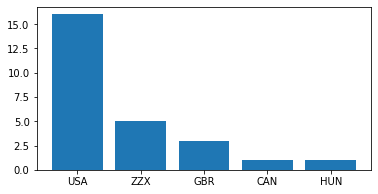

In [18]:
countries, tally = best_by_year(1900)

pp.figure(figsize=(6,3))

bars = pp.bar(np.arange(5),tally,align='center')
pp.xticks(np.arange(5),countries)

In [19]:
pp.style.use('ggplot')

colors = pp.cm.Set3(np.linspace(0,1,5))

def plotyear(year):
    countries, tally = best_by_year(year)

    bars = pp.bar(np.arange(5),tally,align='center')
    pp.xticks(np.arange(5),countries)
    
    for bar, color in zip(bars,colors):
        bar.set_color(color)
    
    pp.title(year)

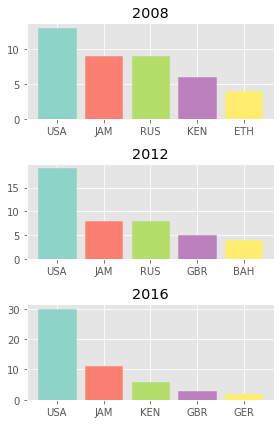

In [20]:
pp.figure(figsize=(4,6))

pp.subplot(3,1,1); plotyear(2008)
pp.subplot(3,1,2); plotyear(2012)
pp.subplot(3,1,3); plotyear(2016)

pp.tight_layout()

In [21]:
winners_by_country = {}

for medal in medals:
    if medal.team not in winners_by_country:
        winners_by_country[medal.team] = [medal.athlete]
    else:
        winners_by_country[medal.team].append(medal.athlete)

In [22]:
winners_by_country['ITA']

['Ugo Frigerio',
 'Ugo Frigerio',
 'Ugo Frigerio',
 'Luigi Beccali',
 'Trebisonda Valla',
 'Adolfo Consolini',
 'Giuseppe Dordoni',
 'Livio Berruti',
 'Abdon Pamich',
 'Pietro Mennea',
 'Maurizio Damilano',
 'Sara Simeoni',
 'Alberto Cova',
 'Gabriella Dorio',
 'Alessandro Andrei',
 'Gelindo Bordin',
 'Ivano Brugnetti',
 'Stefano Baldini',
 'Alex Schwazer']

In [23]:
winners_by_country = collections.defaultdict(list)

for medal in medals:
    winners_by_country[medal.team].append(medal.athlete)

In [24]:
winners_by_country['FRA']

['Michel Theato',
 'Joseph Guillemot',
 'Boughera Mohamed El Ouafi',
 'Micheline Ostermeyer',
 'Micheline Ostermeyer',
 'Alain Mimoun',
 'Colette Besson',
 'Guy Drut',
 'Pierre Quinon',
 'Marie-Jose Perec',
 'Marie-Jose Perec',
 'Marie-Jose Perec',
 'Jean Galfione',
 'Renaud Lavillenie']

**March 2020 update**: beginning in Python 3.6 for the standard CPython implementation of the language, and in Python 3.7 for the core language, the standard `dict` objects preserve the insertion order, so there's no need for `collections.OrderedDict()`; correspondingly, the dict comprehension shown below is generated with the same order as the `OrderedDict`.

In [28]:
ordered_winners = collections.OrderedDict()

for medal in medals:
    if medal.team == 'ITA':
        ordered_winners[medal.athlete] = medal.event + ' ' + medal.year

In [29]:
ordered_winners

OrderedDict([('Ugo Frigerio', '10000m walk men 1924'),
             ('Luigi Beccali', '1500m men 1932'),
             ('Trebisonda Valla', '80m hurdles women 1936'),
             ('Adolfo Consolini', 'discus throw men 1948'),
             ('Giuseppe Dordoni', '50km walk men 1952'),
             ('Livio Berruti', '200m men 1960'),
             ('Abdon Pamich', '50km walk men 1964'),
             ('Pietro Mennea', '200m men 1980'),
             ('Maurizio Damilano', '20km walk men 1980'),
             ('Sara Simeoni', 'high jump women 1980'),
             ('Alberto Cova', '10000m men 1984'),
             ('Gabriella Dorio', '1500m women 1984'),
             ('Alessandro Andrei', 'shot put men 1984'),
             ('Gelindo Bordin', 'marathon men 1988'),
             ('Ivano Brugnetti', '20km walk men 2004'),
             ('Stefano Baldini', 'marathon men 2004'),
             ('Alex Schwazer', '50km walk men 2008')])

In [30]:
{medal.athlete: medal.event + ' ' + medal.year for medal in medals if medal.team == 'ITA'}

{'Ugo Frigerio': '10000m walk men 1924',
 'Luigi Beccali': '1500m men 1932',
 'Trebisonda Valla': '80m hurdles women 1936',
 'Adolfo Consolini': 'discus throw men 1948',
 'Giuseppe Dordoni': '50km walk men 1952',
 'Livio Berruti': '200m men 1960',
 'Abdon Pamich': '50km walk men 1964',
 'Pietro Mennea': '200m men 1980',
 'Maurizio Damilano': '20km walk men 1980',
 'Sara Simeoni': 'high jump women 1980',
 'Alberto Cova': '10000m men 1984',
 'Gabriella Dorio': '1500m women 1984',
 'Alessandro Andrei': 'shot put men 1984',
 'Gelindo Bordin': 'marathon men 1988',
 'Ivano Brugnetti': '20km walk men 2004',
 'Stefano Baldini': 'marathon men 2004',
 'Alex Schwazer': '50km walk men 2008'}

In [31]:
dq = collections.deque(range(10))

In [32]:
dq

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
for i in range(10,15):
    dq.append(i)
    v = dq.popleft()
    print(dq)

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
deque([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
deque([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
deque([4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
deque([5, 6, 7, 8, 9, 10, 11, 12, 13, 14])


In [34]:
for i in reversed(range(0,5)):
    dq.appendleft(i)
    v = dq.pop()
    print(dq)

deque([4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
deque([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
deque([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
